# Review of Monday

# [Buffon's Needle](https://en.wikipedia.org/wiki/Buffon%27s_needle_problem) (calculating $\pi$ with a monte carlo simulation)

## The Question
Supose the floor is divided into vertical strips. We then randomly drop sticks on the floor. What is the probability that a stick intersects the lines dividing the vertical strips. In the image below, stick a intersects and stick b does not intersect.

It turns out, the probability, $p$, is given by:
$$ p = \frac{2}{\pi}\frac{l}{t}$$
where $t$ is the distance between the vertical strips, and $l$ is the length of the sticks being dropped (assuming $t \le l$).

**So, how can we construct a Monte-Carlo simulation to calulate $\pi$ using this information?**

1. Analyze Problem (define variables)
  *  $t$: distance between lines
  *  $l$: length of stick
  *  $N_{int}$: Number of sticks that intersect lines
  *  $N$: Total number of sticks
1. Formulate a model (steps to run the simulation)
  1. Set-up our board (side lengths/area)
  1. Add divisions to the board
  1. Per stick: get length, **angle**, **position**
  1. Count the number of sticks that intersect
  1.
1. Solve the model (write the simulation)
1. Verify the model (do we get $\pi$?)
1. Report on the model (we will skip)
1. Maintain the model (we will skip)


![Image depicting Buffon's Needle problem](https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Buffon_needle.svg/1920px-Buffon_needle.svg.png)






---



[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
Probability of crossing a division: 0.320
Estimation of pi: 3.124


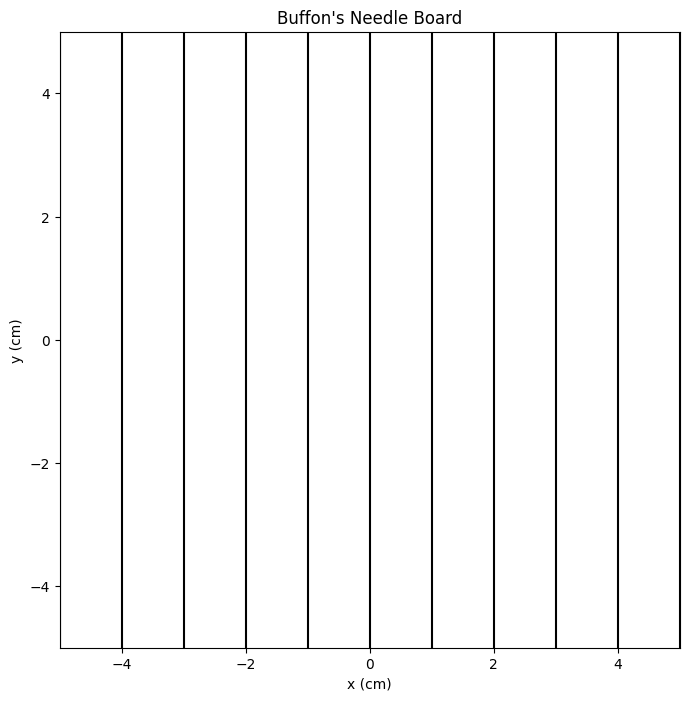

In [34]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt

# Define varibles to describe model
t = 1
l = 0.5
N = 10000
NInt = 0
divisions = [] # x-location of division on the board
L = 10         # Length of board


# Setup the board to drop stick on
plt.figure(figsize=(8,8))
plt.title("Buffon's Needle Board")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)


# Returns true if a vertical division lies between xs[0] and xs[1]
def crosses_division(xs):
  xs.sort()
  for divx in divisions:
    if xs[0] < divx and divx < xs[1]:
      return True
  return False


# Plots a line centered at (x,y) with a given length and angle, angle is defined with respect to x axis.
# angle is assumed to be in radians
# returns true if the line intersects a division, false otherwise
def plot_line(x, y, length, angle, plot=True):
  dx = length/2 * np.cos(angle)
  dy = length/2 * np.sin(angle)
  px = [x+dx, x-dx]
  py = [y+dy, y-dy]
  if crosses_division(px):
    # If this crosses one of our divisions draw it in gold and update the counter
    if plot:
      plt.plot(px,py,'-',color='goldenrod')
    return True
  elif plot:
    # If this does not cross one of our divisions draw it in red
    plt.plot(px,py,'-',color='red')
    return False

### Begining of Monte-Carlo code ###

# Calculate divisions on board
divisions =  np.arange(-L/2, L/2+.00001,t)
print(divisions)

# Draw vertical lines
for div in divisions:
  plt.plot([div, div], [L/2, -L/2], '-', color='black')


# Run the Monte Carlo
for i in range(N):
  x = rand.uniform(-L/2, L/2)
  y = rand.uniform(-L/2, L/2)
  angle = rand.uniform(0, 2*np.pi)
  if plot_line(x,y,l,angle, False):
    NInt = NInt +1


prob = NInt/N
pi = 2*l/(prob*t)
print(f"Probability of crossing a division: {prob:.3f}")
print(f"Estimation of pi: {pi:.3f}")